# Featured Recipe #4: Introduction to Machine Learning in Python with scikit-learn

> This is a featured recipe from the [**IPython Cookbook**](http://ipython-books.github.io/), the definitive guide to **high-performance scientific computing** and **data science** in Python.

In **Statistical Data Analysis**, we are interested in getting insight into data, understanding complex phenomena through partial observations, and making informed decisions in the presence of uncertainty. In **Machine Learning**, we are still interested in analyzing and processing data using statistical tools. However, the goal is not necessarily to *understand* the data, but to *learn* from it.

Learning from data is close to what we do, as humans. From our experience, we intuitively learn general facts and relations about the world, even if we don't fully understand its complexity. The increasing computational power of computers makes them able to learn from data, too. That's the heart of [**machine learning**](http://en.wikipedia.org/wiki/Machine_learning), a modern and fascinating branch of artificial intelligence, computer science, statistics, and applied mathematics.

This featured recipe is a hands-on introduction to the most fundamental concepts in machine learning. These concepts are routinely used by data scientists. We will illustrate them with **scikit-learn**, a popular and user-friendly Python package for machine learning.

> This featured recipe is [Chapter 8](https://github.com/ipython-books/cookbook-code/blob/master/toc.md#chapter-8-machine-learning)'s introduction. In the [book](http://ipython-books.github.io/), the rest of the chapter illustrates many standard machine learning algorithms for classification, regression, feature selection, clustering, and dimension reduction.

## Fundamental concepts in Machine Learning

Let's describe the fundamental definitions and concepts of machine learning.

### Learning from data

In machine learning, most datasets can be represented as tables containing numerical values. Every row is called an **observation**, a **sample**, or a **data point**. Every column is called a **feature** or a **variable**.

Let's call $N$ the number of rows (or number of points), and $D$ the number of columns (or number of features). The number $D$ is also called the **dimensionality** of the data. The reason is that we can view this table as a set $E$ of vectors in a space with $D$ dimensions (or **vector space**). Here, a vector $x$ contains $D$ numbers $(x_1, ..., x_D)$, also called **components**. This mathematical point of view is very useful and we will use it throughout this recipe. 

One generally makes the distinction between *supervised learning* and *unsupervised learning*.

* [**Supervised learning**](http://en.wikipedia.org/wiki/Supervised_learning) is when we have a label $y$ associated to every data point $x$. The goal is to learn the mapping from $x$ to $y$ from our data. The data gives us this mapping for a finite set of points, but what we want is to *generalize* this mapping. In other words, we want to find the label of any point $x$ that does not belong to our data.

* [**Unsupervised learning**](http://en.wikipedia.org/wiki/Unsupervised_learning) is when we don't have any labels. What we want to do is discover some hidden structure in the data.

### Supervised learning

Mathematically, supervised learning consists of finding a function $f$ that maps a set of points $E$ to a set of labels $F$, knowing a finite set of associations $(x, y)$ which is given by our data. This is what generalization is about: after observing the pairs $(x_i, y_i)$, given a new $x$, we are able to find the corresponding $y$ by applying the function $f$ to $x$.

It is a common practice to split the set of data points into two subsets: the **training set** and the **test set**. We learn the function $f$ on the training set, and test it on the test set. This is essential when assessing the predictive power of a model. By training and testing a model on the same set, our model may not be able to generalize well. This is the fundamental concept of **overfitting**, which we will detail later.

One generally makes the distinction between **classification** and **regression**, two particular instances of supervised learning.

* **Classification** is when our labels $y$ can only take a finite set of values (categories). Examples include:
    * Handwritten digit recognition: $x$ is an image with a handwritten digit, $y$ is a digit between 0 and 9.
    * Spam filtering: $x$ is an e-mail, and $y$ is 0 or 1 whether that e-mail is a spam or not.

* **Regression** is when our labels $y$ can take any real (continuous) value. Examples include:
    * Predicting stock market.
    * Predicting sales.
    * Detecting the age of a person from a picture.

The figure below illustrates the difference between classification and regression.

![Difference between classification and regression](images/ml.png)

### Unsupervised learning

Broadly speaking, unsupervised learning helps us discover systemic structures in our data. It is harder to grasp than supervised learning, in that there is no precise question and answer in general.

Here are a few important terms related to unsupervised learning: 

* **Clustering**: Grouping similar points together within clusters.
* **Density estimation**: Estimating a probability density that can explain the distribution of the data points.
* **Dimension reduction**: Getting a simple representation of high-dimensional data points by projecting them onto a lower-dimensional space. This technique is notably used for data visualization.
* **Manifold learning** (or nonlinear dimension reduction): Finding a low-dimensional manifold containing the data points.

### Feature selection and feature extraction

In a supervised learning context, when our data contains many features, it is sometimes necessary to choose a subset of them. The features we want to keep are those that are most relevant to our question. This is the problem of **feature selection**.

Additionally, we may want to extract new features by applying complex transformations on our original dataset. This is **feature extraction**. For example, in computer vision, training a classifier directly on the pixels is not the most efficient method in general. We may want to extract the relevant points of interest or make appropriate mathematical transformations. These steps depend on our dataset and on the questions we want to answer.

For example, it is often necessary to preprocess the data before learning models. **Feature scaling** (or **data normalization**) is a common preprocessing step where features are linearly rescaled to fit in the range $[-1,1]$ or $[0,1]$.

Feature extraction and feature selection involve a balanced combination of domain expertise, intuition, and mathematical methods. These early steps are crucial, and they may be even more important than the learning steps themselves. The reason is that the few dimensions that are relevant to our problem are generally hidden in the high dimensionality of our dataset. We need to uncover the low-dimensional structure of interest to improve the efficiency of our learning models.

*Chapter 8* illustrates a few feature selection and feature extraction methods. Methods that are specific to signals, images or sounds are covered in *Chapter 10* and *Chapter 11*. Here are a few further references:

* [Feature selection in scikit-learn](http://scikit-learn.org/stable/modules/feature_selection.html)
* [Feature selection on Wikipedia](http://en.wikipedia.org/wiki/Feature_selection)

### Overfitting, underfitting, and the bias-variance tradeoff

A central notion in machine learning is the trade-off between [**overfitting**](http://en.wikipedia.org/wiki/Overfitting) and [**underfitting**](http://en.wikipedia.org/wiki/Underfitting). A model may be able to represent our data accurately. However, if it is *too* accurate, it may not generalize well to unobserved data. For example, in face recognition, a too-accurate model would be unable to identity someone who styled their hair differently that day. The reason is that our model may learn irrelevant features in the training data. On the contrary, an insufficiently trained model would not generalize well either. For example, it would be unable to correctly recognize twins. 

A popular solution to reduce overfitting consists of adding structure to the model, for example with [**regularization**](http://en.wikipedia.org/wiki/Regularization_%28mathematics%29). This method favors simpler models during training ([Occam's razor](http://en.wikipedia.org/wiki/Occam%27s_razor)).

The [**bias-variance dilemma**](http://en.wikipedia.org/wiki/Bias-variance_dilemma) is closely related. The **bias** of a model quantifies how precise a model is across training sets. The **variance** quantifies how sensitive the model is to small changes in the training set. A robust model is not overly sensitive to small changes. The dilemma involves minimizing both bias and variance; we want a precise and robust model. Simpler models tend to be less accurate but more robust. Complex models tend to be more accurate but less robust.

The importance of this trade-off cannot be overstated. This question pervades the entire discipline of machine learning. *Chapter 8* contains many examples.

### Model selection

As we will see in *Chapter 8*, there are many supervised and unsupervised algorithms. For example, well-known classifiers that we will cover include logistic regression, nearest-neighbors, Naive Bayes, support vector machines. There are many others algorithms that we couldn't cover.

No model performs uniformly better than the others. One model may perform well on one dataset and badly on another. This is the question of [**model selection**](http://en.wikipedia.org/wiki/Model_selection).

We will see systematic methods for assessing the quality of a model on a particular dataset (notably cross-validation). In practice, machine learning is not an "exact science" in that it frequently involves trials and errors. We need to try different models and empirically choose the one that performs best.

That being said, understanding the details of the learning models allows us to gain intuition about which model is best adapted to our current problem.

Here are a few references on this question:

* [Model evaluation in scikit-learn](http://scikit-learn.org/stable/modules/model_evaluation.html)
* [How to choose a classifier?](http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/)

An important class of machine learning methods that we couldn't cover in *Chapter 8* include [**neural networks**](http://en.wikipedia.org/wiki/Artificial_neural_network) and [**deep learning**](http://en.wikipedia.org/wiki/Deep_learning). Deep learning is the subject of very active research in machine learning. Many state-of-the-art results are currently achieved by deep learning methods.

## Getting started with scikit-learn

Let's now introduce the basics of the machine learning package [**scikit-learn**](http://scikit-learn.org). This package is the main tool we are going to use throughout the chapter. Its clean API makes it really easy to define, train, and test models. Plus, scikit-learn is specifically designed for speed and (relatively) big data.

We will show here a very basic example of **linear regression** in the context of **curve fitting**. This toy example will allow us to illustrate key concepts such as linear models, overfitting, underfitting, regularization, and cross-validation.

> You will find all instructions to install scikit-learn on the [documentation](http://scikit-learn.org/stable/install.html).

## How to do it...

We will generate a one-dimensional dataset with a simple model (including some noise), and we will try to fit a function to this data. With this function, we can predict values on new data points. This is a curve-fitting regression problem.

1. First, let's make all the necessary imports.

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

2. We now define the deterministic function underlying our generative model.

In [2]:
f = lambda x: np.exp(3 * x)

3. We generate the values along the curve on $[0, 2]$.

In [3]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

4. Now, let's generate our data points within $[0, 1]$. We use the function $f$ and we add some Gaussian noise.

In [4]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

5. Let's plot our data points on $[0, 1]$.

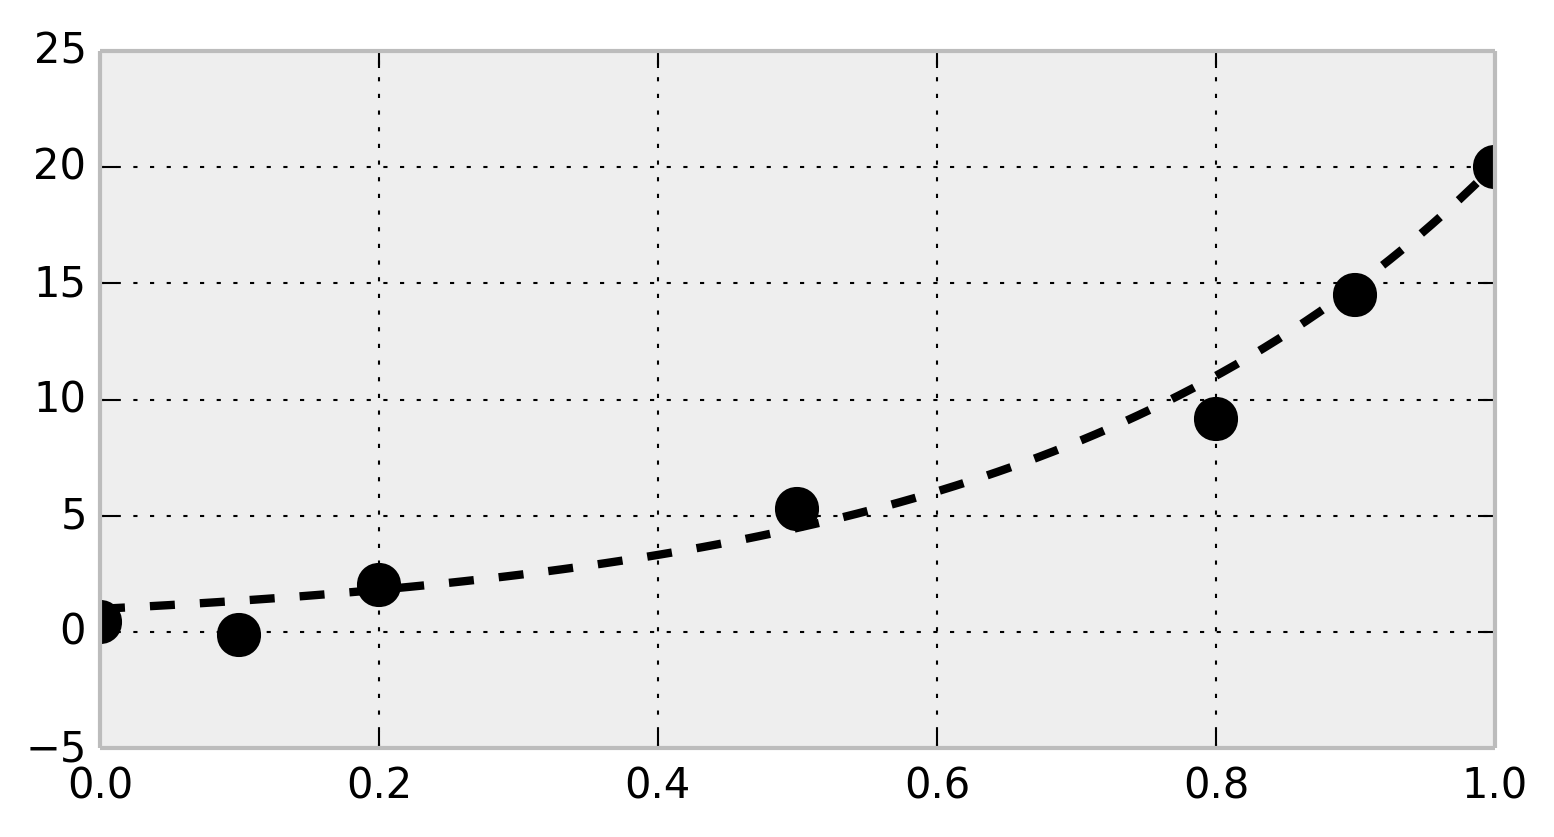

In [5]:
plt.figure(figsize=(6,3));
plt.plot(x_tr[:100], y_tr[:100], '--k');
plt.plot(x, y, 'ok', ms=10);

6. Now, we use scikit-learn to fit a linear model to the data. There are three steps. First, we create the model (an instance of the `LinearRegression` class). Then we fit the model to our data. Finally, we predict values from our trained model.

In [6]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

We need to convert `x` and `x_tr` to column vectors, as it is a general convention in scikit-learn that observations are rows, while features are columns. Here, we have 7 observations with 1 feature.

7. We now plot the result of the trained linear model. We obtain a regression line, in green here.

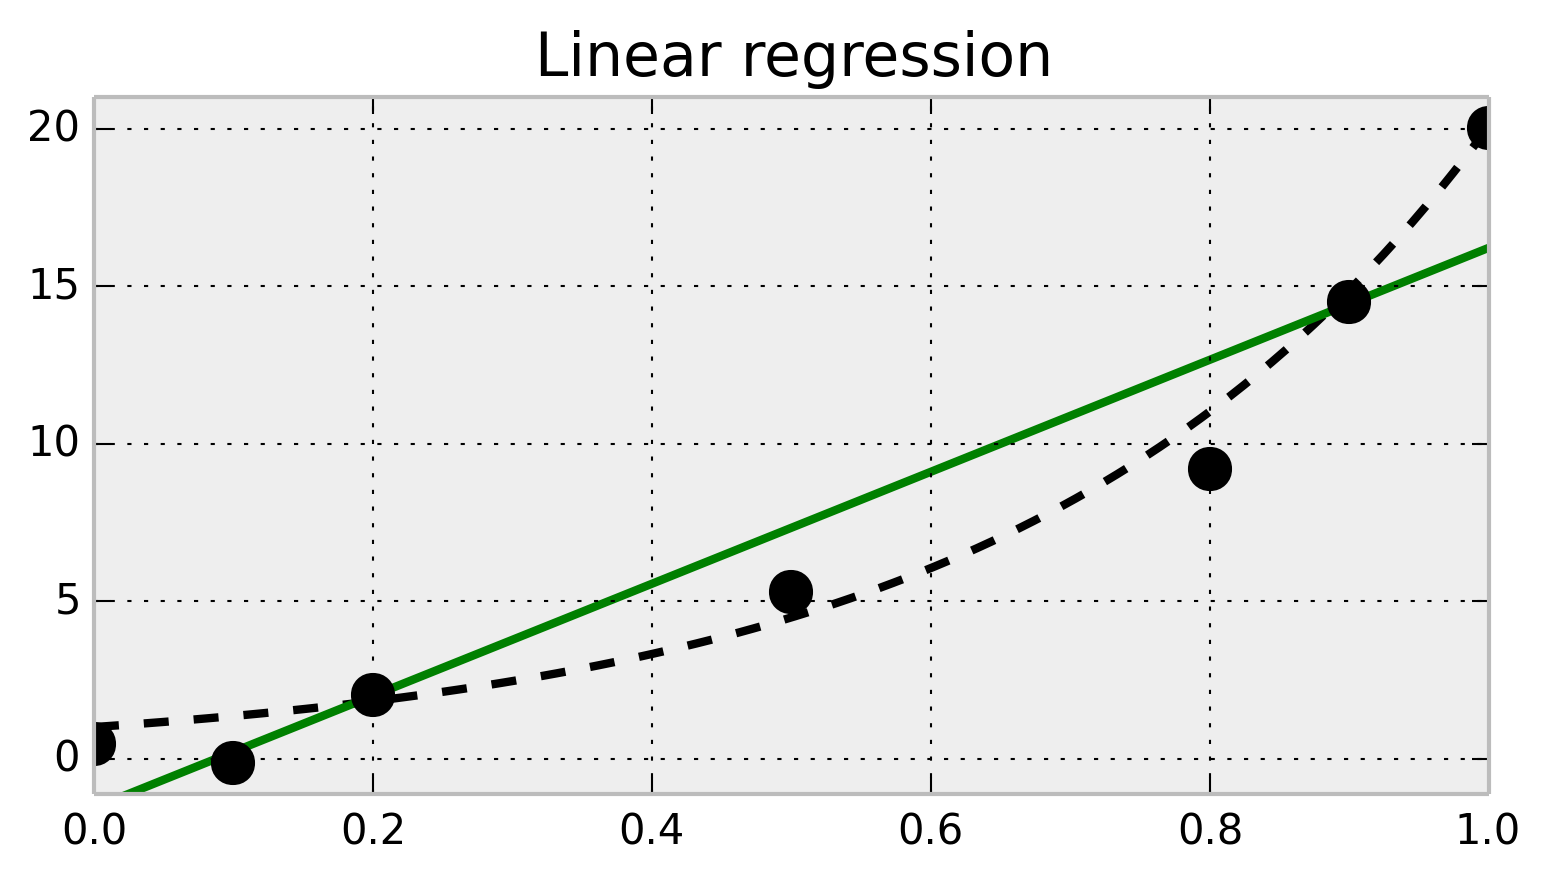

In [7]:
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.xlim(0, 1);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear regression");

8. The linear fit is not well adapted here, since the data points are generated according to a nonlinear model (an exponential curve). Therefore, we are now going to fit a nonlinear model. More precisely, we will fit a polynomial function to our data points. We can still use linear regression for that, by pre-computing the exponents of our data points. This is done by generating a **Vandermonde matrix**, using the `np.vander` function. We will explain this trick in more detail in *How it works...*.

22.03 -4.25 0.00
-476.66 1286.40 -1171.56 419.94 -38.56 0.00


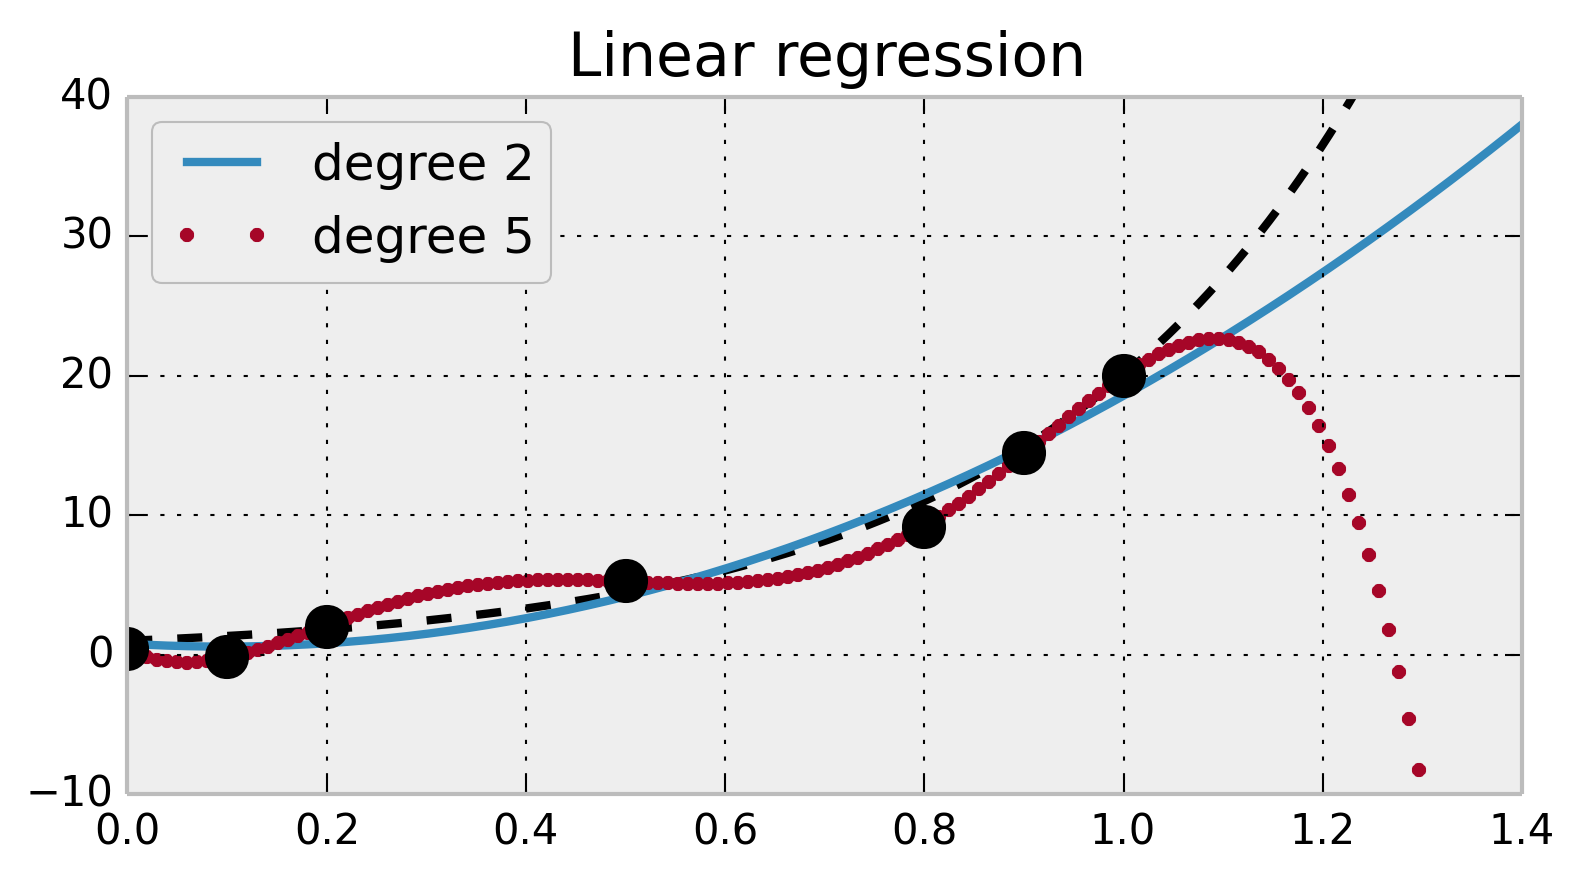

In [8]:
lrp = lm.LinearRegression()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y);
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.4);
    plt.ylim(-10, 40);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Linear regression");

We have fitted two polynomial models of degree 2 and 5. The degree 2 polynomial appears to fit the data points less precisely than the degree 5 polynomial. However, it seems more robust: the degree 5 polynomial seems really bad at predicting values outside the data points (look for example at the portion $x >= 1$). This is what we call overfitting: by using a too complex model, we obtain a better fit on the trained dataset, but a less robust model outside this set. Note the large coefficients of the degree 5 polynomial: this is generally a sign of overfitting.

9. We will now use a different learning model, called **ridge regression**. It works like linear regression, except that it prevents the polynomial's coefficients to explode (which was what happened in the overfitting example above). By adding a **regularization term** in the **loss function**, ridge regression imposes some structure on the underlying model. We will see more details in the next section.

The ridge regression model has a meta-parameter which represents the weight of the regularization term. We could try different values with trials and errors, using the `Ridge` class. However, scikit-learn includes another model called `RidgeCV` which includes a parameter search with cross-validation. In practice, it means that we don't have to tweak this parameter by hand: scikit-learn does it for us. Since the models of scikit-learn always follow the `fit`-`predict` API, all we have to do is replace `lm.LinearRegression` by `lm.RidgeCV` in the code above. We will give more details in the next section.

11.26 5.93 0.00
4.39 3.80 3.32 3.27 3.97 0.00


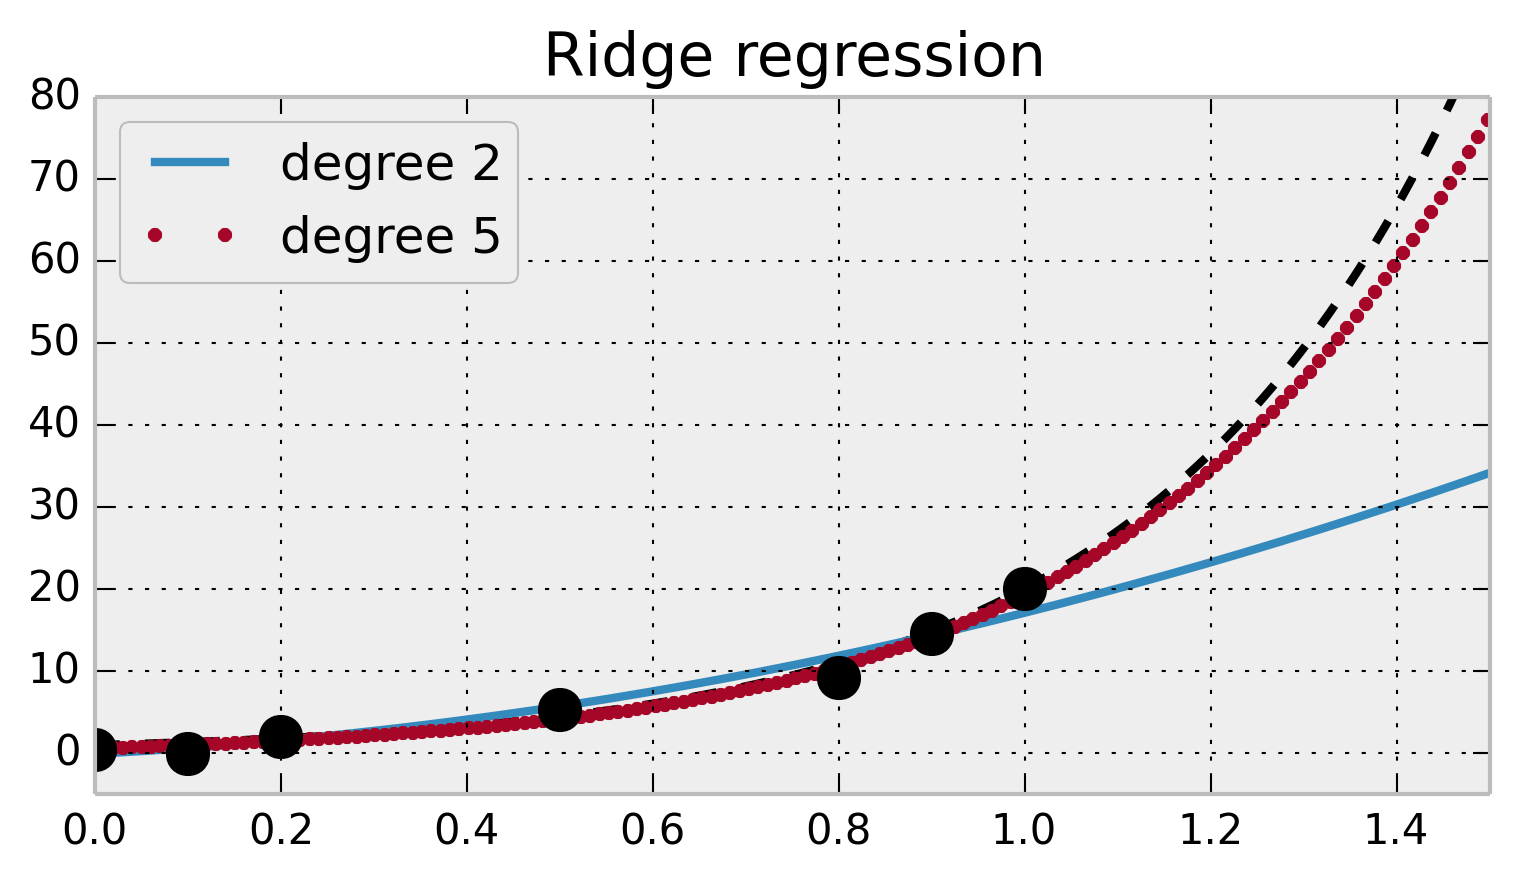

In [9]:
ridge = lm.RidgeCV()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y);
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_ridge, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.5);
    plt.ylim(-5, 80);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in ridge.coef_]))

plt.plot(x, y, 'ok', ms=10);
plt.title("Ridge regression");

This time, the degree 5 polynomial seems more precise than the simpler degree 2 polynomial (which now causes underfitting). Ridge regression reduces the overfitting issue here. Observe how the degree 5 polynomial's coefficients are much smaller than in the previous example.

## How it works...

In this section, we will explain all the aspects covered in the example above.

### scikit-learn API

scikit-learn implements a clean and coherent API for supervised and unsupervised learning. Our data points should be in a $N \times D$ matrix $\mathbf{X}$, where $N$ is the number of observations, and $D$ is the number of features. In other words, each row is an observation. The first step in a machine learning task is to define what our matrix $\mathbf{X}$ is exactly.

In a supervised learning setup, we also have a *target*, a $N$-long vector $\mathbf{y}$ with a scalar value for each observations. This value is continuous or discrete, depending on whether we have a regression or classification problem, respectively.

In scikit-learn, models are implemented in classes that have `fit` and `predict` methods. The `fit` method accepts the data matrix `X` as input, and `y` as well for supervised learning models. This method *trains* the model on the given data.

The `predict` method also takes data points as input (as a matrix $M \times D$). It returns the labels or transformed points, according to the trained model.

### Ordinary Least Squares regression

[Ordinary least squares regression](http://en.wikipedia.org/wiki/Ordinary_least_squares) is one of the simplest regression methods. It consists of modeling the output values $\hat{y}_i$ as a linear combination of $X_{ij}$:

$$\forall i \in \{1, \ldots, N\}, \quad \hat{y}_i = \sum_{j=1}^D w_j X_{ij}, \quad \textrm{or, in matrix form:} \quad \mathbf{\hat{y}} = \mathbf{X} \mathbf{w}.$$

Here, $\mathbf{w} = (w_1, \ldots, w_D)$ is the (unknown) *parameter vector*. Also, $\mathbf{\hat{y}}$ represents the model's output. We want this vector to match the data points $\mathbf{y}$ as closely as possible. Of course, the exact equality $\mathbf{\hat{y}} = \mathbf{y}$ cannot hold in general (there is always some amount of noise in real-world data). Therefore, we want to *minimize* the difference between those two vectors. The ordinary least squares regression method consists of minimizing the following [**loss function**](http://en.wikipedia.org/wiki/Loss_function):

$$\min_{\mathbf{w}} || \mathbf{y} - \mathbf{X} \mathbf{w} ||_2^2 = \min_{\mathbf{w}} \left( \sum_{i=1}^N \left(y_i - \hat{y}_i\right)^2 \right)$$

This sum of the components squared is called the [**$l_2$ norm**](http://en.wikipedia.org/wiki/Lp_space) (or [**Euclidean norm**](http://en.wikipedia.org/wiki/Euclidean_distance)). It is convenient because it leads to *differentiable* loss functions, so that gradients can be computed and common optimization procedures can be performed.

### Polynomial interpolation with linear regression

Ordinary Least Squares regression fits a linear model to the data. The model is linear both in the data points $X_i$ and in the parameters $w_j$. In our example, we obtained a poor fit because the data points were generated according to a nonlinear generative model (an exponential function).

However, we can still use the linear regression method with a model that is linear in $w_j$, but nonlinear in $\mathbf{x}_i$. To do this, we need to increase the number of dimensions in our dataset by using a basis of polynomial functions. In other words, we consider the following observations:

$$\mathbf{x}_i, \mathbf{x}_i^2, \ldots, \mathbf{x}_i^D$$

where $D$ is the maximum degree. The input matrix $\mathbf{X}$ is therefore the [**Vandermonde matrix**](http://en.wikipedia.org/wiki/Vandermonde_matrix) associated to the original data points $\mathbf{x}_i$.

### Ridge regression

Polynomial interpolation with linear regression can lead to overfitting issues if the degree of the polynomials is too large. By capturing the random fluctuations (noise) instead of the general trend of the data, the model's predictive power decreases. This corresponds to an explosion of the polynomial's coefficients $w_j$.

A solution to this problem is to prevent these coefficients from growing unboundedly. With [**ridge regression**](http://en.wikipedia.org/wiki/Tikhonov_regularization), this is done by adding a *regularization* term to the loss function:

$$\min_{\mathbf{w}} || \mathbf{y} - \mathbf{X} \mathbf{w} ||_2^2 + \alpha ||\mathbf{w}||_2^2$$

By minimizing this loss function, we not only minimize the error between the model and the data (first term, related to the bias), but also the size of the model's coefficients (second term, related to the variance). The bias-variance trade-off is quantified by the hyperparameter $\alpha$, which precises the relative weight between the two terms in the loss function.

Here, ridge regression led to a polynomial with smaller coefficients, and thus a better fit.

### Cross-validation and grid search

A drawback of the ridge regression model compared to the ordinary least squares model is the presence of an extra hyperparameter $\alpha$. The quality of the prediction depends on the choice of this parameter. One possibility would be to fine-tune this parameter manually, but this procedure can be tedious and can also lead to overfitting.

We can use a [**grid search**](http://en.wikipedia.org/wiki/Hyperparameter_optimization) for this: we loop over many possible values for $\alpha$, and we evaluate the performance of the model for each possible value. Then, we choose the parameter that yields the best performance.

How to assess the performance of a model with a given $\alpha$ value? A common solution is to use [**cross-validation**](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). This procedure consists of splitting the dataset into a *train set* and a *test set*. We fit the model on the train set, and test its predictive performance on the *test set*. By testing the model on a different dataset than the one used for training, we avoid overfitting.

There are many ways to split the initial dataset into two parts like this. One possibility is to remove *one* sample to form the train set, and to put this one sample into the test set. This is called **Leave-One-Out** cross-validation. With $N$ samples, we obtain $N$ sets of train and test sets. The cross-validated performance is the average performance on all these set decompositions.

As we will see in *Chapter 8*, scikit-learn implements several easy-to-use functions to do cross-validation and grid search. Here, we used a special estimator called `RidgeCV` that implements a cross-validation and grid search procedure that is specific to the ridge regression model. Using this model ensures that the best hyperparameter $\alpha$ is found automatically for us.

> In the book, the [rest of the chapter](https://github.com/ipython-books/cookbook-code/blob/master/toc.md#chapter-8-machine-learning) introduces many standard algorithms in machine learning.

## There's more…

Here are a few references about cross-validation and grid search:

* [Cross validation in scikit-learn](http://scikit-learn.org/stable/modules/cross_validation.html).
* [Grid search in sciki-learn](http://scikit-learn.org/stable/modules/grid_search.html).

Here are a few references about scikit-learn:

* [scikit-learn basic tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html).
* [scikit-learn tutorial given at the SciPy 2013 conference](http://github.com/jakevdp/sklearn_scipy2013).

### Books

Here are a few excellent, math-heavy textbooks on machine learning:

* Bishop, C. M. (2006). [*Pattern recognition and machine learning*](http://research.microsoft.com/en-us/um/people/cmbishop/prml/). Springer.
* Murphy, K. P. (2012). [*Machine learning: a probabilistic perspective*](http://www.cs.ubc.ca/~murphyk/MLbook/). MIT Press.
* Hastie, T., Tibshirani, R., Friedman, J., Hastie, T., Friedman, J., & Tibshirani, R. (2009). [*The Elements of Statistical Learning*](http://statweb.stanford.edu/~tibs/ElemStatLearn/). Springer.

Here are a few books targetting programmers without necessarily a strong mathematical background:

* Conway, D., & White, J. (2012). [*Machine Learning for Hackers*](http://shop.oreilly.com/product/0636920018483.do). O'Reilly Media, Inc.
* Harrington, P. (2012). [*Machine Learning in Action*](http://www.manning.com/pharrington/). Manning Publications Co.

You will find many other references online.

> This was a featured recipe from the [IPython Cookbook](http://ipython-books.github.io/), by [Cyrille Rossant](http://cyrille.rossant.net), Packt Publishing, 2014.